# Notebook for exploring the heatmap results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [3]:
base_dir = '../../'
paths = {
# standard resutls (internal, external)
'p1':'results/evaluation_test/plots/',
# model pooling / ensembling:
'p2': 'results/evaluation_test/prediction_pooled_subsampled/max/plots/',
# finetuned models on 10%:
'p3': 'results/finetuning/evaluation_test/plots/',
# baseline (of finetuning) on 10%:
'p4': 'results/finetuning/evaluation_test/baseline/plots/',
# finetuned models on 10%:
'p5': 'results/finetuning_0_20/evaluation_test/plots/',
# baseline (of finetuning) on 10%:
'p6': 'results/finetuning_0_20/evaluation_test/baseline/plots/',
# finetuning 10% + pooled preds
'p7': 'results/finetuning/evaluation_test/prediction_pooled_subsampled/max/plots',
}
paths = {key: os.path.join(base_dir, val) for key, val in paths.items()}

In [4]:
paths

{'p1': '../../results/evaluation_test/plots/',
 'p2': '../../results/evaluation_test/prediction_pooled_subsampled/max/plots/',
 'p3': '../../results/finetuning/evaluation_test/plots/',
 'p4': '../../results/finetuning/evaluation_test/baseline/plots/',
 'p5': '../../results/finetuning_0_20/evaluation_test/plots/',
 'p6': '../../results/finetuning_0_20/evaluation_test/baseline/plots/',
 'p7': '../../results/finetuning/evaluation_test/prediction_pooled_subsampled/max/plots'}

In [5]:
roc_paths = {key: os.path.join(path, 'roc_summary_subsampled.csv') for key, path in paths.items()}

In [6]:
scatter_paths = {key: os.path.join(path, 'scatter_agg_data.csv') for key, path in paths.items()}

In [24]:
ls ../../results/finetuning_0_20/evaluation_test/plots/scatter*

../../results/finetuning_0_20/evaluation_test/plots/scatter_agg_data.csv
../../results/finetuning_0_20/evaluation_test/plots/scatter_raw_data.csv
../../results/finetuning_0_20/evaluation_test/plots/scatterplot_aumc_eicu_pat_thres_80_subsampled.png
../../results/finetuning_0_20/evaluation_test/plots/scatterplot_aumc_hirid_pat_thres_80_subsampled.png
../../results/finetuning_0_20/evaluation_test/plots/scatterplot_aumc_mimic_pat_thres_80_subsampled.png
../../results/finetuning_0_20/evaluation_test/plots/scatterplot_eicu_aumc_pat_thres_80_subsampled.png
../../results/finetuning_0_20/evaluation_test/plots/scatterplot_eicu_hirid_pat_thres_80_subsampled.png
../../results/finetuning_0_20/evaluation_test/plots/scatterplot_eicu_mimic_pat_thres_80_subsampled.png
../../results/finetuning_0_20/evaluation_test/plots/scatterplot_hirid_aumc_pat_thres_80_subsampled.png
../../results/finetuning_0_20/evaluation_test/plots/scatterplot_hirid_eicu_pat_thres_80_subsampled.png
../../results/finetuning_0_20/ev

In [7]:
paths

{'p1': '../../results/evaluation_test/plots/',
 'p2': '../../results/evaluation_test/prediction_pooled_subsampled/max/plots/',
 'p3': '../../results/finetuning/evaluation_test/plots/',
 'p4': '../../results/finetuning/evaluation_test/baseline/plots/',
 'p5': '../../results/finetuning_0_20/evaluation_test/plots/',
 'p6': '../../results/finetuning_0_20/evaluation_test/baseline/plots/',
 'p7': '../../results/finetuning/evaluation_test/prediction_pooled_subsampled/max/plots'}

In [35]:
dfs = {key: pd.read_csv(val) for key,val in roc_paths.items()} 

In [36]:
dfs = {key: df.drop(columns='Unnamed: 0') for key, df in dfs.items()}

In [37]:
[df.columns for k, df in dfs.items()]

[Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object'),
 Index(['model', 'train_dataset', 'eval_dataset', 'auc_mean', 'auc_std'], dtype='object')]

In [38]:
dfs['p3']['finetuned'] = True
dfs['p1']['finetuned'] = False
dfs['p2']['finetuned'] = False
dfs['p4']['finetuned'] = False
dfs['p5']['finetuned'] = True
dfs['p6']['finetuned'] = False
dfs['p7']['finetuned'] = True


In [39]:
# indicator if it's the finetuning baseline:
dfs['p3']['baseline'] = False
dfs['p1']['baseline'] = False
dfs['p2']['baseline'] = False
dfs['p4']['baseline'] = True
dfs['p5']['baseline'] = False
dfs['p6']['baseline'] = True
dfs['p7']['baseline'] = False


In [40]:
# finetuning size: (training size for baseline)
dfs['p3']['finetuning_size'] = 0.10
dfs['p1']['finetuning_size'] = np.nan
dfs['p2']['finetuning_size'] = np.nan
dfs['p4']['finetuning_size'] = 0.10
dfs['p5']['finetuning_size'] = 0.02
dfs['p6']['finetuning_size'] = 0.02
dfs['p7']['finetuning_size'] = 0.10


In [41]:
# finetuning size: (training size for baseline)
dfs['p3']['pooled'] = False
dfs['p1']['pooled'] = False
dfs['p2']['pooled'] = True
dfs['p4']['pooled'] = False
dfs['p5']['pooled'] = False
dfs['p6']['pooled'] = False
dfs['p7']['pooled'] = True


In [42]:
dfs['p1']

,model,train_dataset,eval_dataset,auc_mean,auc_std,finetuned,baseline,finetuning_size,pooled
0,AttentionModel,aumc,aumc,0.917711,0.003569,False,False,NaN,False
1,GRUModel,aumc,aumc,0.856986,0.014407,False,False,NaN,False
2,lgbm,aumc,aumc,0.893829,0.004515,False,False,NaN,False
3,lr,aumc,aumc,0.883245,0.001715,False,False,NaN,False
4,mews,aumc,aumc,0.718061,0.000000,False,False,NaN,False
...,...,...,...,...,...,...,...,...,...
175,mews,mimic,mimic,0.609294,0.000000,False,False,NaN,False
176,news,mimic,mimic,0.652844,0.000000,False,False,NaN,False
177,qsofa,mimic,mimic,0.565961,0.000000,False,False,NaN,False
178,sirs,mimic,mimic,0.609423,0.000000,False,False,NaN,False


In [13]:
sdfs['p1']

NameError: name 'sdfs' is not defined

In [43]:
df = pd.concat(dfs)

In [44]:
scatter_paths

{'p1': '../../results/evaluation_test/plots/scatter_agg_data.csv',
 'p2': '../../results/evaluation_test/prediction_pooled_subsampled/max/plots/scatter_agg_data.csv',
 'p3': '../../results/finetuning/evaluation_test/plots/scatter_agg_data.csv',
 'p4': '../../results/finetuning/evaluation_test/baseline/plots/scatter_agg_data.csv',
 'p5': '../../results/finetuning_0_20/evaluation_test/plots/scatter_agg_data.csv',
 'p6': '../../results/finetuning_0_20/evaluation_test/baseline/plots/scatter_agg_data.csv',
 'p7': '../../results/finetuning/evaluation_test/prediction_pooled_subsampled/max/plots/scatter_agg_data.csv'}

## load scatter results

In [45]:
sdfs = {key: pd.read_csv(val) for key,val in scatter_paths.items()} #scatter dfs

In [46]:
# restrict to attn model:
keys = ['p1', 'p2']
for key in keys:
    dfs[key] = dfs[key].query("model == 'AttentionModel'")
    sdfs[key] = sdfs[key].query("model.str.contains('attn')") #different versions of attn
    

In [47]:
full_dfs = {}
for k in dfs.keys():
    full_dfs[k] = pd.merge(dfs[k], sdfs[k], on=['train_dataset', 'eval_dataset'])

In [48]:
for k in full_dfs.keys():
    full_dfs[k] = full_dfs[k].rename(columns=
        {'x_mean': 'earliness_mean', 
         'x_std': 'earliness_std', 
         'y_mean': 'precision_mean', 
         'y_std': 'precision_std' }
    )

In [49]:
df = pd.concat(full_dfs)

In [50]:
df['model_x'].unique()

array(['AttentionModel'], dtype=object)

In [51]:
# we look at the attn model:
df = df.query("model_x == 'AttentionModel'")
# drop obsolete dataset (too heterogenous / low quality)
df = df.query("train_dataset != 'emory' & eval_dataset != 'emory'")

In [52]:
df

model_x train_dataset eval_dataset  auc_mean   auc_std  \
p1 0   AttentionModel          aumc         aumc  0.917711  0.003569   
   1   AttentionModel          aumc         eicu  0.698006  0.010686   
   3   AttentionModel          aumc        hirid  0.733108  0.013438   
   4   AttentionModel          aumc        mimic  0.685606  0.013133   
   5   AttentionModel          eicu         aumc  0.731821  0.007108   
   6   AttentionModel          eicu         eicu  0.802502  0.003536   
   8   AttentionModel          eicu        hirid  0.705312  0.026872   
   9   AttentionModel          eicu        mimic  0.714940  0.009202   
   15  AttentionModel         hirid         aumc  0.806525  0.014401   
   16  AttentionModel         hirid         eicu  0.705568  0.009348   
   18  AttentionModel         hirid        hirid  0.834322  0.002237   
   19  AttentionModel         hirid        mimic  0.648077  0.012512   
   20  AttentionModel         mimic         aumc  0.798606  0.022978   
   21  AttentionModel         mimic         eicu  0.753329  0.007784   
   23  AttentionModel         mimic        hirid  0.694860  0.010384   
   24  AttentionModel         mimic        mimic  0.831972  0.003256   
p2 0   AttentionModel        pooled         aumc  0.835573  0.010908   
   1   AttentionModel        pooled         eicu  0.759670  0.006823   
   2   AttentionModel        pooled        hirid  0.729156  0.013789   
   3   AttentionModel        pooled        mimic  0.720870  0.005167   
p3 0   AttentionModel          aumc         eicu  0.756370  0.007211   
   1   AttentionModel          aumc        hirid  0.792255  0.002184   
   2   AttentionModel          aumc        mimic  0.786427  0.002008   
   3   AttentionModel          eicu         aumc  0.873594  0.016944   
   4   AttentionModel          eicu        hirid  0.774104  0.001855   
   5   AttentionModel          eicu        mimic  0.789502  0.002433   
   6   AttentionModel         hirid         aumc  0.867947  0.010989   
   7   AttentionModel         hirid         eicu  0.761983  0.004556   
   8   AttentionModel         hirid        mimic  0.794380  0.002116   
   9   AttentionModel         mimic         aumc  0.894071  0.003426   
   10  AttentionModel         mimic         eicu  0.793121  0.003726   
   11  AttentionModel         mimic        hirid  0.797083  0.004061   
p4 0   AttentionModel          aumc         aumc  0.829317  0.004322   
   1   AttentionModel          eicu         eicu  0.729738  0.005943   
   2   AttentionModel         hirid        hirid  0.787233  0.001456   
   3   AttentionModel         mimic        mimic  0.782670  0.002296   
p5 0   AttentionModel          aumc         eicu  0.724866  0.003635   
   1   AttentionModel          aumc        hirid  0.774966  0.002813   
   2   AttentionModel          aumc        mimic  0.699866  0.023450   
   3   AttentionModel          eicu         aumc  0.773791  0.041005   
   4   AttentionModel          eicu        hirid  0.729016  0.010541   
   5   AttentionModel          eicu        mimic  0.724120  0.011153   
   6   AttentionModel         hirid         aumc  0.844473  0.011185   
   7   AttentionModel         hirid         eicu  0.742710  0.006265   
   8   AttentionModel         hirid        mimic  0.737982  0.009524   
   9   AttentionModel         mimic         aumc  0.843931  0.013971   
   10  AttentionModel         mimic         eicu  0.780288  0.002248   
   11  AttentionModel         mimic        hirid  0.782912  0.003641   
p6 0   AttentionModel          aumc         aumc  0.807556  0.006384   
   1   AttentionModel          eicu         eicu  0.711287  0.003618   
   2   AttentionModel         hirid        hirid  0.763304  0.001136   
   3   AttentionModel         mimic        mimic  0.745647  0.002570   
p7 0   AttentionModel        pooled         aumc  0.883985  0.009676   
   1   AttentionModel        pooled         eicu  0.770197  0.002738   
   2   AttentionModel        pooled        hirid  0.77

In [56]:
df_int = df.query("train_dataset == eval_dataset & \
        finetuned == False & \
        train_dataset != 'pooled' & \
        baseline == False"
)
assert len(df_int) == 4

model_x train_dataset eval_dataset  auc_mean   auc_std  \
p1 0   AttentionModel          aumc         aumc  0.917711  0.003569   
   6   AttentionModel          eicu         eicu  0.802502  0.003536   
   18  AttentionModel         hirid        hirid  0.834322  0.002237   
   24  AttentionModel         mimic        mimic  0.831972  0.003256   

       finetuned  baseline  finetuning_size  pooled model_y  earliness_mean  \
p1 0       False     False              NaN   False  attn             4.055   
   6       False     False              NaN   False  attn             4.625   
   18      False     False              NaN   False  attn             2.770   
   24      False     False              NaN   False  attn             3.365   

       earliness_std  precision_mean  precision_std  
p1 0        0.079844        0.531098       0.022103  
   6        1.212693        0.321037       0.010810  
   18       0.130384        0.363912       0.008250  
   24       0.236907        0.356650       0.006018

In [58]:
auc_int_mean = df_int.mean(axis=0)['auc_mean']
auc_int_std = df_int.std(axis=0)['auc_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/2948288264.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  auc_int_mean = df_int.mean(axis=0)['auc_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/2948288264.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  auc_int_std = df_int.std(axis=0)['auc_mean']


In [59]:
earliness_means = {}
earliness_stds = {}
precision_means = {}
precision_stds = {}

In [60]:
earliness_means['int'] = df_int.mean()['earliness_mean']
earliness_stds['int'] = df_int.std()['earliness_mean']



/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/1228713345.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['int'] = df_int.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/1228713345.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['int'] = df_int.std()['earliness_mean']


In [61]:
earliness_means

{'int': 3.70375}

0.049551997380370444

In [62]:
auc_int_mean

0.8466267443625092

In [67]:
# mean pair-wise AUC (no finetuning, no pooling)
auc_pw_mean = df.query("train_dataset != eval_dataset & finetuned == False & train_dataset != 'pooled' & baseline == False")['auc_mean'].mean()
auc_pw_std = df.query("train_dataset != eval_dataset & finetuned == False & train_dataset != 'pooled' & baseline == False")['auc_mean'].std()

In [77]:
df_pw = df.query("train_dataset != eval_dataset & finetuned == False & train_dataset != 'pooled' & baseline == False")
assert len(df_pw) == 12

In [78]:
df_pw

model_x train_dataset eval_dataset  auc_mean   auc_std  \
p1 1   AttentionModel          aumc         eicu  0.698006  0.010686   
   3   AttentionModel          aumc        hirid  0.733108  0.013438   
   4   AttentionModel          aumc        mimic  0.685606  0.013133   
   5   AttentionModel          eicu         aumc  0.731821  0.007108   
   8   AttentionModel          eicu        hirid  0.705312  0.026872   
   9   AttentionModel          eicu        mimic  0.714940  0.009202   
   15  AttentionModel         hirid         aumc  0.806525  0.014401   
   16  AttentionModel         hirid         eicu  0.705568  0.009348   
   19  AttentionModel         hirid        mimic  0.648077  0.012512   
   20  AttentionModel         mimic         aumc  0.798606  0.022978   
   21  AttentionModel         mimic         eicu  0.753329  0.007784   
   23  AttentionModel         mimic        hirid  0.694860  0.010384   

       finetuned  baseline  finetuning_size  pooled model_y  earliness_mean  \
p1 1       False     False              NaN   False  attn             3.755   
   3       False     False              NaN   False  attn             3.220   
   4       False     False              NaN   False  attn             4.235   
   5       False     False              NaN   False  attn             3.455   
   8       False     False              NaN   False  attn             2.680   
   9       False     False              NaN   False  attn             4.115   
   15      False     False              NaN   False  attn             1.280   
   16      False     False              NaN   False  attn             2.930   
   19      False     False              NaN   False  attn             3.090   
   20      False     False              NaN   False  attn             2.825   
   21      False     False              NaN   False  attn             3.590   
   23      False     False              NaN   False  attn             0.905   

       earliness_std  precision_mean  precision_std  
p1 1        1.246044        0.244710       0.007552  
   3        1.072147        0.270946       0.012086  
   4        1.187908        0.227974       0.008421  
   5        1.525451        0.254022       0.010373  
   8        1.153581        0.252045       0.018139  
   9        0.273633        0.243277       0.004945  
   15       0.613239        0.327414       0.035004  
   16       0.918286        0.241868       0.008305  
   19       0.915253        0.205877       0.007570  
   20       1.902383        0.315987       0.049013  
   21       1.004459        0.283009       0.010858  
   23       0.942802        0.237810       0.009988

In [64]:
earliness_means['pw'] = df_pw.mean()['earliness_mean']
earliness_stds['pw'] = df_pw.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/1354249333.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['pw'] = df_pw.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/1354249333.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['pw'] = df_pw.std()['earliness_mean']


In [65]:
earliness_means

{'int': 3.70375, 'pw': 3.0066666666666664}

In [68]:
auc_pw_mean

0.7229798509928985

In [69]:
# mean pooled AUC (no finetuning)
auc_po_mean = df.query("train_dataset == 'pooled' & finetuned == False & baseline == False")['auc_mean'].mean()
auc_po_std = df.query("train_dataset == 'pooled' & finetuned == False & baseline == False")['auc_mean'].std()


In [74]:
df_po = df.query("train_dataset == 'pooled' & finetuned == False & baseline == False")
assert len(df_po) == 4

In [73]:
df_po

model_x train_dataset eval_dataset  auc_mean   auc_std  \
p2 0  AttentionModel        pooled         aumc  0.835573  0.010908   
   1  AttentionModel        pooled         eicu  0.759670  0.006823   
   2  AttentionModel        pooled        hirid  0.729156  0.013789   
   3  AttentionModel        pooled        mimic  0.720870  0.005167   

      finetuned  baseline  finetuning_size  pooled model_y  earliness_mean  \
p2 0      False     False              NaN    True  attn             0.955   
   1      False     False              NaN    True  attn             1.470   
   2      False     False              NaN    True  attn             1.225   
   3      False     False              NaN    True  attn             3.365   

      earliness_std  precision_mean  precision_std  
p2 0       0.844911        0.368059       0.029036  
   1       1.178638        0.285484       0.011018  
   2       1.282332        0.265123       0.010473  
   3       0.449514        0.252695       0.004614

In [79]:
earliness_means['po'] = df_po.mean()['earliness_mean']
earliness_stds['po'] = df_po.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/4184905722.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['po'] = df_po.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/4184905722.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['po'] = df_po.std()['earliness_mean']


{'int': 0.8080261443790046, 'pw': 1.0195773039784077, 'po': 1.0945651724162737}

In [80]:
auc_po_mean

0.7613171965323347

## finetuning on 10%

In [81]:
# mean finetuned AUC 10% 
auc_ft10_mean = df.query("train_dataset != 'pooled' & finetuned == True & baseline == False & finetuning_size == 0.10")['auc_mean'].mean()
auc_ft10_std = df.query("train_dataset != 'pooled' & finetuned == True & baseline == False & finetuning_size == 0.10")['auc_std'].mean()


In [82]:
def get_ft(ft_size=0.10):
    return df.query("train_dataset != 'pooled' & finetuned == True & baseline == False & finetuning_size == @ft_size")

In [83]:
df_ft10 = get_ft(0.10)
auc_ft10_mean = df_ft10['auc_mean'].mean()
auc_ft10_std = df_ft10['auc_mean'].std()
assert len(df_ft10) == 12

In [88]:
df_ft10

model_x train_dataset eval_dataset  auc_mean   auc_std  \
p3 0   AttentionModel          aumc         eicu  0.756370  0.007211   
   1   AttentionModel          aumc        hirid  0.792255  0.002184   
   2   AttentionModel          aumc        mimic  0.786427  0.002008   
   3   AttentionModel          eicu         aumc  0.873594  0.016944   
   4   AttentionModel          eicu        hirid  0.774104  0.001855   
   5   AttentionModel          eicu        mimic  0.789502  0.002433   
   6   AttentionModel         hirid         aumc  0.867947  0.010989   
   7   AttentionModel         hirid         eicu  0.761983  0.004556   
   8   AttentionModel         hirid        mimic  0.794380  0.002116   
   9   AttentionModel         mimic         aumc  0.894071  0.003426   
   10  AttentionModel         mimic         eicu  0.793121  0.003726   
   11  AttentionModel         mimic        hirid  0.797083  0.004061   

       finetuned  baseline  finetuning_size  pooled model_y  earliness_mean  \
p3 0        True     False              0.1   False  attn             3.375   
   1        True     False              0.1   False  attn             4.275   
   2        True     False              0.1   False  attn             4.085   
   3        True     False              0.1   False  attn             2.850   
   4        True     False              0.1   False  attn             2.765   
   5        True     False              0.1   False  attn             3.495   
   6        True     False              0.1   False  attn             3.140   
   7        True     False              0.1   False  attn             2.855   
   8        True     False              0.1   False  attn             2.675   
   9        True     False              0.1   False  attn             1.500   
   10       True     False              0.1   False  attn             3.980   
   11       True     False              0.1   False  attn             2.405   

       earliness_std  precision_mean  precision_std  
p3 0        1.219375        0.283055       0.010133  
   1        0.269838        0.314837       0.004383  
   2        0.271339        0.294975       0.002620  
   3        1.014889        0.446497       0.040464  
   4        0.621892        0.293611       0.003086  
   5        0.361594        0.303076       0.006224  
   6        1.011589        0.410842       0.035182  
   7        0.733655        0.286573       0.006346  
   8        0.446864        0.303278       0.005638  
   9        0.546580        0.487837       0.020819  
   10       0.758782        0.321017       0.008107  
   11       0.361594        0.304273       0.005657

In [259]:
df_ft10 #old run, with bug in line 3

model_x train_dataset eval_dataset  auc_mean   auc_std  \
p3 0   AttentionModel          aumc         eicu  0.756370  0.007211   
   1   AttentionModel          aumc        hirid  0.792255  0.002184   
   2   AttentionModel          aumc        mimic  0.786427  0.002008   
   3   AttentionModel          eicu         aumc  0.846289  0.050213   
   4   AttentionModel          eicu        hirid  0.774104  0.001855   
   5   AttentionModel          eicu        mimic  0.789502  0.002433   
   6   AttentionModel         hirid         aumc  0.867947  0.010989   
   7   AttentionModel         hirid         eicu  0.761983  0.004556   
   8   AttentionModel         hirid        mimic  0.794380  0.002116   
   9   AttentionModel         mimic         aumc  0.894071  0.003426   
   10  AttentionModel         mimic         eicu  0.793121  0.003726   
   11  AttentionModel         mimic        hirid  0.797083  0.004061   

       finetuned  baseline  finetuning_size model_y  earliness_mean  \
p3 0        True     False              0.1  attn             3.375   
   1        True     False              0.1  attn             4.275   
   2        True     False              0.1  attn             4.085   
   3        True     False              0.1  attn             2.910   
   4        True     False              0.1  attn             2.765   
   5        True     False              0.1  attn             3.495   
   6        True     False              0.1  attn             3.140   
   7        True     False              0.1  attn             2.855   
   8        True     False              0.1  attn             2.675   
   9        True     False              0.1  attn             1.500   
   10       True     False              0.1  attn             3.980   
   11       True     False              0.1  attn             2.405   

       earliness_std  precision_mean  precision_std  
p3 0        1.219375        0.283055       0.010133  
   1        0.269838        0.314837       0.004383  
   2        0.271339        0.294975       0.002620  
   3        1.097953        0.405345       0.081347  
   4        0.621892        0.293611       0.003086  
   5        0.361594        0.303076       0.006224  
   6        1.011589        0.410842       0.035182  
   7        0.733655        0.286573       0.006346  
   8        0.446864        0.303278       0.005638  
   9        0.546580        0.487837       0.020819  
   10       0.758782        0.321017       0.008107  
   11       0.361594        0.304273       0.005657

In [89]:
earliness_means['ft10'] = df_ft10.mean()['earliness_mean']
earliness_stds['ft10'] = df_ft10.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/894474592.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['ft10'] = df_ft10.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/894474592.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['ft10'] = df_ft10.std()['earliness_mean']


In [90]:
earliness_means

{'int': 3.70375,
 'pw': 3.0066666666666664,
 'po': 1.7537500000000001,
 'ft10': 3.116666666666667}

In [91]:
auc_ft10_mean

0.8067364255118971

In [93]:
# mean baseline AUC (internally trained on finetuning data) 10% size
auc_base10_mean = df.query("train_dataset != 'pooled' & finetuned == False & baseline == True & finetuning_size == 0.10")['auc_mean'].mean()
auc_base10_std =  df.query("train_dataset != 'pooled' & finetuned == False & baseline == True & finetuning_size == 0.10")['auc_std'].mean()

In [94]:
def get_baseline(ft_size=0.10):
    return df.query("train_dataset != 'pooled' & finetuned == False & baseline == True & finetuning_size == @ft_size")

In [95]:
df_base10 = get_baseline(0.10)
auc_base10_mean = df_base10['auc_mean'].mean()
auc_base10_std = df_base10['auc_mean'].std()

In [96]:
auc_base10_mean

0.7822397449362146

In [97]:
df_base2

NameError: name 'df_base2' is not defined

In [98]:
earliness_means['int10'] = df_base10.mean()['earliness_mean']
earliness_stds['int10'] = df_base10.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/1832192828.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['int10'] = df_base10.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/1832192828.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['int10'] = df_base10.std()['earliness_mean']


In [202]:
earliness_stds 

{'int': 0.8080261443790046,
 'pw': 1.0195773039784077,
 'po': 1.0945651724162737,
 'ft10': 0.785370015092288,
 'int10': 1.9149298290015755}

## finetuning on 2%

In [99]:
df_ft2 = get_ft(0.02)
auc_ft2_mean = df_ft2['auc_mean'].mean()
auc_ft2_std = df_ft2['auc_mean'].std()

In [100]:
earliness_means['ft2'] = df_ft2.mean()['earliness_mean']
earliness_stds['ft2'] = df_ft2.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/2657514013.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['ft2'] = df_ft2.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/2657514013.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['ft2'] = df_ft2.std()['earliness_mean']


In [101]:
earliness_means

{'int': 3.70375,
 'pw': 3.0066666666666664,
 'po': 1.7537500000000001,
 'ft10': 3.116666666666667,
 'int10': 6.03875,
 'ft2': 3.507916666666667}

In [102]:
auc_ft2_mean

0.7632434823574795

In [103]:
df_base2 = get_baseline(0.02)
auc_base2_mean = df_base2['auc_mean'].mean()
auc_base2_std = df_base2['auc_mean'].std()

In [104]:
earliness_means['int2'] = df_base2.mean()['earliness_mean']
earliness_stds['int2'] = df_base2.std()['earliness_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/1515663671.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_means['int2'] = df_base2.mean()['earliness_mean']
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/1515663671.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earliness_stds['int2'] = df_base2.std()['earliness_mean']


In [105]:
auc_base2_mean

0.7569484196682784

## finetuned 10% with pooled preds

In [106]:
df_ft10po = df.query("train_dataset == 'pooled' & finetuned == True & baseline == False")


In [107]:
df_ft10po

model_x train_dataset eval_dataset  auc_mean   auc_std  \
p7 0  AttentionModel        pooled         aumc  0.883985  0.009676   
   1  AttentionModel        pooled         eicu  0.770197  0.002738   
   2  AttentionModel        pooled        hirid  0.779573  0.001816   
   3  AttentionModel        pooled        mimic  0.795438  0.002163   

      finetuned  baseline  finetuning_size  pooled model_y  earliness_mean  \
p7 0       True     False              0.1    True  attn              2.00   
   1       True     False              0.1    True  attn              3.26   
   2       True     False              0.1    True  attn              2.84   
   3       True     False              0.1    True  attn              3.45   

      earliness_std  precision_mean  precision_std  
p7 0       1.470225        0.479475       0.019430  
   1       0.687750        0.293600       0.004886  
   2       0.370220        0.303068       0.002332  
   3       0.244310        0.309495       0.006718

NameError: name 'auc_ft_mean' is not defined

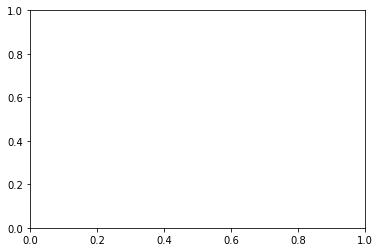

In [209]:
fig, ax = plt.subplots()
x_pos = np.arange(4)
aucs = [auc_pw_mean, auc_po_mean, auc_ft_mean, auc_int_mean]
stds = [auc_pw_std, auc_po_std, auc_ft_std, auc_int_std]

names = ['pair-wise', 'pooled', 'finetuning', 'internal']
ax.bar(x_pos, aucs, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylim(0.5,0.9)

ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.tight_layout()
plt.ylabel(f'AUROC (mean $\pm$ std)')

NameError: name 'auc_ft_mean' is not defined

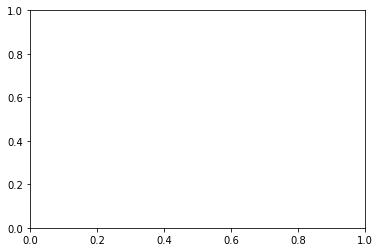

In [139]:
fig, ax = plt.subplots()
x_pos = np.arange(4)
aucs = [auc_pw_mean, auc_po_mean, auc_ft_mean, auc_int_mean]
stds = [auc_pw_std, auc_po_std, auc_ft_std, auc_int_std]

names = ['pair-wise', 'pooled', 'finetuning', 'internal']
ax.errorbar(x_pos, aucs, yerr=stds, ecolor='black', capsize=7, fmt='d', color='black')
ax.set_ylim(0.7,0.9)

ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.tight_layout()
plt.ylabel(f'AUROC (mean $\pm$ std)')

SyntaxError: invalid non-printable character U+200B (347523906.py, line 9)

Text(14.375, 0.5, 'AUROC (mean $\\pm$ std)')

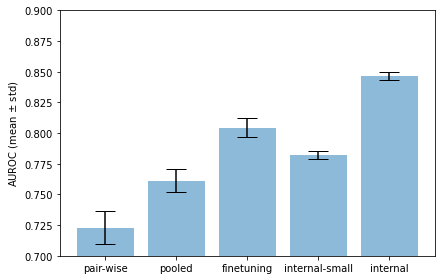

In [27]:
fig, ax = plt.subplots()
x_pos = np.arange(5)
aucs = [auc_pw_mean, auc_po_mean, auc_ft_mean, auc_base_mean, auc_int_mean]
stds = [auc_pw_std, auc_po_std, auc_ft_std, auc_base_std, auc_int_std]

names = ['pair-wise', 'pooled', 'finetuning', 'internal-small', 'internal']
ax.bar(x_pos, aucs, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylim(0.7,0.9)

ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.tight_layout()
plt.ylabel(f'AUROC (mean $\pm$ std)')

Text(0.5, 1.0, 'Performance across datasets')

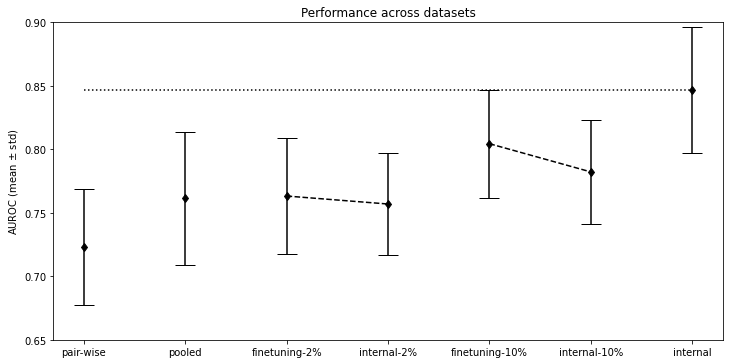

In [275]:
fig, ax = plt.subplots(figsize=(10,5))
x_pos = np.arange(7)
aucs = [auc_pw_mean, auc_po_mean, auc_ft2_mean, auc_base2_mean, auc_ft10_mean, auc_base10_mean, auc_int_mean]
stds = [auc_pw_std, auc_po_std, auc_ft2_std, auc_base2_std, auc_ft10_std, auc_base10_std, auc_int_std]

names = ['pair-wise', 'pooled', 'finetuning-2%', 'internal-2%', 'finetuning-10%', 'internal-10%', 'internal']
ax.errorbar(x_pos, aucs, yerr=stds, ecolor='black', capsize=10, fmt='d', color='black')
ax.set_ylim(0.65,0.9)

ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.tight_layout()
plt.ylabel(f'AUROC (mean $\pm$ std)')

plt.plot((2,3), (auc_ft2_mean, auc_base2_mean), '--', color='black')
plt.plot((4,5), (auc_ft10_mean, auc_base10_mean), '--', color='black')
plt.hlines(auc_int_mean, 0,6, color='black', linestyle='dotted')

plt.title('Performance across datasets')

In [109]:
df = df.reset_index()

In [110]:
mapping = {'p1': 'internal', 
           'p2': 'pooled', 
           'p3': 'finetuning-10%',
           'p4': 'internal-10%',
           'p5': 'finetuning-2%',
           'p6': 'internal-2%',
           'p7': 'finetuning-10%-pooled'
}
df['level_0'] = df['level_0'].apply(lambda x: mapping.get(x))

In [111]:
df = df.rename(columns={'level_0': 'task'})

In [112]:
df

,task,level_1,model_x,train_dataset,eval_dataset,auc_mean,auc_std,finetuned,baseline,finetuning_size,pooled,model_y,earliness_mean,earliness_std,precision_mean,precision_std
0,internal,0,AttentionModel,aumc,aumc,0.917711,0.003569,False,False,NaN,False,attn,4.055,0.079844,0.531098,0.022103
1,internal,1,AttentionModel,aumc,eicu,0.698006,0.010686,False,False,NaN,False,attn,3.755,1.246044,0.244710,0.007552
2,internal,3,AttentionModel,aumc,hirid,0.733108,0.013438,False,False,NaN,False,attn,3.220,1.072147,0.270946,0.012086
3,internal,4,AttentionModel,aumc,mimic,0.685606,0.013133,False,False,NaN,False,attn,4.235,1.187908,0.227974,0.008421
4,internal,5,AttentionModel,eicu,aumc,0.731821,0.007108,False,False,NaN,False,attn,3.455,1.525451,0.254022,0.010373
5,internal,6,AttentionModel,eicu,eicu,0.802502,0.003536,False,False,NaN,False,attn,4.625,1.212693,0.321037,0.010810
6,internal,8,AttentionModel,eicu,hirid,0.705312,0.026872,False,False,NaN,False,attn,2.680,1.153581,0.252045,0.018139
7,internal,9,AttentionModel,eicu,mimic,0.714940,0.009202,False,False,NaN,False,attn,4.115,0.273633,0.243277,0.004945
8,internal,15,AttentionModel,hirid,aumc,0.806525,0.014401,False,False,NaN,False,attn,1.280,0.613239,0.327414,0.035004
9,internal,16,AttentionModel,hirid,eicu,0.705568,0.009348,False,False,NaN,False,attn,2.930,0.918286,0.241868,0.008305


<AxesSubplot:xlabel='task', ylabel='auc_mean'>

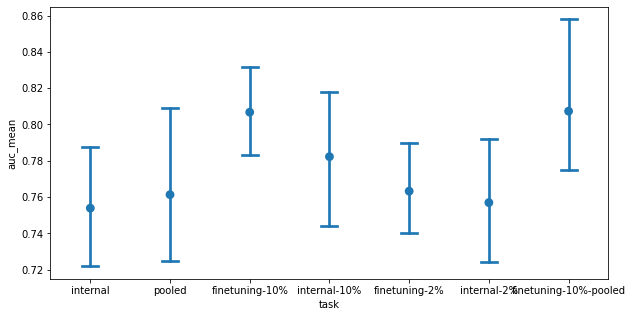

In [113]:
plt.figure(figsize=(10,5))
sns.pointplot(x='task', y='auc_mean', data=df, join=False, capsize=0.2)

In [114]:
earliness_means

{'int': 3.70375,
 'pw': 3.0066666666666664,
 'po': 1.7537500000000001,
 'ft10': 3.116666666666667,
 'int10': 6.03875,
 'ft2': 3.507916666666667,
 'int2': 6.921249999999999}

In [115]:
def get_measure(df, func, measure):
    return getattr(df, func)()[measure]


In [116]:
get_measure(df_int, 'std', 'earliness_mean')

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/3095324987.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(df, func)()[measure]


0.8080261443790046

In [117]:
keys = ['int', 'pw', 'po', 'ft10', 'int10', 'ft2', 'int2', 'ft10po']
df_ = [df_int, df_pw, df_po, df_ft10, df_base10, df_ft2, df_base2, df_ft10po]

In [118]:
earliness_means = {}
earliness_stds = {}
for key, _df in zip(keys, df_):
    earliness_means[key] = get_measure(_df, 'mean', 'earliness_mean')
    earliness_stds[key] = get_measure(_df, 'std', 'earliness_mean')

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/3095324987.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(df, func)()[measure]


In [119]:
earliness_means

{'int': 3.70375,
 'pw': 3.0066666666666664,
 'po': 1.7537500000000001,
 'ft10': 3.116666666666667,
 'int10': 6.03875,
 'ft2': 3.507916666666667,
 'int2': 6.921249999999999,
 'ft10po': 2.8875}

In [120]:
precision_means = {}
precision_stds = {}
for key, _df in zip(keys, df_):
    precision_means[key] = get_measure(_df, 'mean', 'precision_mean')
    precision_stds[key] = get_measure(_df, 'std', 'precision_mean')

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/3095324987.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(df, func)()[measure]


In [121]:
auc_means = {}
auc_stds = {}
for key, _df in zip(keys, df_):
    auc_means[key] = get_measure(_df, 'mean', 'auc_mean')
    auc_stds[key] = get_measure(_df, 'std', 'auc_mean')

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/3095324987.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return getattr(df, func)()[measure]


In [122]:
keys_sorted = ['pw', 'po', 'ft2', 'ft10', 'ft10po', 'int']

In [123]:
aucs_m = [auc_means[k] for k in keys_sorted]
aucs_s = [auc_stds[k] for k in keys_sorted]
earliness_m = [earliness_means[k] for k in keys_sorted]
earliness_s = [earliness_stds[k] for k in keys_sorted]
precision_m = [precision_means[k] for k in keys_sorted]
precision_s = [precision_stds[k] for k in keys_sorted]

{}

[0.7229798509928985,
 0.7613171965323347,
 0.7632434823574795,
 0.7569484196682784,
 0.8044610478536885,
 0.7822397449362146,
 0.8466267443625092]

In [209]:
df_int['task'] = 'internal'
df_pw['task'] = 'pair-wise' 
df_po['task'] = 'pooled'
df_ft10['task'] = 'ft-10%' 
df_ft2['task'] = 'ft-2%'
df_ft10po['task'] = 'ft-10%-pooled' 


/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/3380255286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int['task'] = 'internal'
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/3380255286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pw['task'] = 'pair-wise'
/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/3380255286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [210]:
# raw values:
df_tot = pd.concat([df_pw, df_po, df_ft2, df_ft10, df_ft10po, df_int])

In [137]:
df_ft10po.mean()['precision_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/1196983362.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ft10po.mean()['precision_mean']


0.346409378294573

In [141]:
df_int.mean()['precision_mean']

/var/folders/vp/67rz7yg93fn4hrmg1q9wpbbm0000gn/T/ipykernel_33560/3433370938.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_int.mean()['precision_mean']


0.3931742786496343

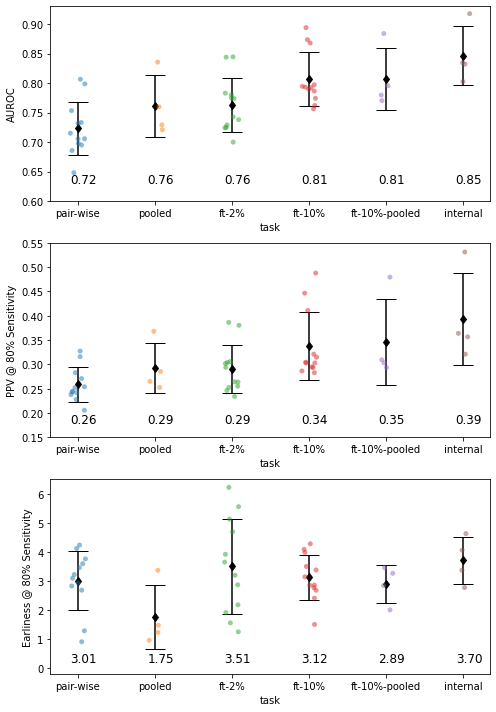

In [213]:
plt.figure(figsize=(7,10))
ax1 = plt.subplot(311)

x_pos = np.arange(6) #7
#aucs = [auc_pw_mean, auc_po_mean, auc_ft2_mean, auc_base2_mean, auc_ft10_mean, auc_base10_mean, auc_int_mean]
#stds = [auc_pw_std, auc_po_std, auc_ft2_std, auc_base2_std, auc_ft10_std, auc_base10_std, auc_int_std]
names = ['pair-wise', 'pooled', 'ft-2%',  'ft-10%', 'ft-10%-pooled', 'internal']
ax1.errorbar(x_pos, aucs_m, yerr=aucs_s, ecolor='black', capsize=10, fmt='d', color='black')
sns.stripplot(x="task", y="auc_mean", data=df_tot, jitter=0.1, ax=ax1,alpha=0.5)

ax1.set_ylim(0.60,0.93)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(names)
#ax[0].tight_layout()
ax1.set_ylabel(f'AUROC')

ax2 = plt.subplot(312, sharex= ax1)

#plt.plot((2,3), (auc_ft2_mean, auc_base2_mean), '--', color='black')
#plt.plot((4,5), (auc_ft10_mean, auc_base10_mean), '--', color='black')
#plt.hlines(auc_int_mean, 0,6, color='black', linestyle='dotted')
sns.stripplot(x="task", y="precision_mean", data=df_tot, jitter=0.1, ax=ax2, alpha=0.5)
ax2.errorbar(x_pos, precision_m, yerr=precision_s, ecolor='black', capsize=10, fmt='d', color='black')
ax2.set_ylabel(f'PPV @ 80% Sensitivity')
ax2.set_ylim(0.15,0.55)

#ax[1].set_xticklabels(names)
#ax[1].tight_layout()

ax3 = plt.subplot(313, sharex= ax1)
sns.stripplot(x="task", y="earliness_mean", data=df_tot, jitter=0.1, ax=ax3, alpha=0.5)
ax3.errorbar(x_pos, earliness_m, yerr=earliness_s, ecolor='black', capsize=10, fmt='d', color='black')
ax3.set_ylabel(f'Earliness @ 80% Sensitivity')
#ax[2].set_xticklabels(names)
ax3.set_ylim(-0.2,6.5)


plt.tight_layout()
x1 = np.arange(7)
y1 = np.array([0.13] * 7)
for i,j, n in zip(x1,y1, aucs_m):
    ax1.annotate(f'{n:.2f}',xy=(i-0.1,j+0.5), size=12)
y2 = np.array([0.18] * 7)

for i,j, n in zip(x1,y2, precision_m):
    ax2.annotate(f'{n:.2f}',xy=(i-0.1,j), size=12)

y3 = np.array([0.2] * 7)
for i,j, n in zip(x1,y3, earliness_m):
    ax3.annotate(f'{n:.2f}',xy=(i-0.1,j), size=12)
    

In [181]:
precision_m

[0.2587448972219523,
 0.2928404749003678,
 0.29076371654636074,
 0.33748924406995057,
 0.346409378294573,
 0.3931742786496343]

# Notes

- csv of these results
- plot with increasingly smaller finetuning split
- check nemati paper again
- how much data collection can be prevented using pretraining?

# TO